In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.stats.outliers_influence \
  import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [4]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

In [5]:
#Question 8
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [6]:
#8a
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                'horsepower': Auto['horsepower']})
X[:4]

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150


In [7]:
y = Auto['mpg']
model = sm.OLS(y, X)
results = model.fit()

In [8]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           7.03e-81
Time:                        00:57:03   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
np.sqrt(results.scale)/y.mean()

0.20923714066914834

In [11]:
design = MS(['horsepower'])
X = design.fit_transform(Auto)
X[:4]

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150


In [12]:
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [13]:
new_predictions = results.get_prediction(newX); new_predictions.predicted_mean

array([24.46707715])

In [14]:
new_predictions.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [15]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

8a)
i.There is a relation between the predictor and response since the t statistic is <0.05/2.\
ii.There is a moderately strong relationship between the predictor and response since R^2=60.6% is high, and the percentage error of ~20% is low.\
iii.The relation is **negative** between predictor and response since beta_1 estimate is less than 0.\
iv.Preditcted mpg with 98 horsepower is 24.46707715.\
Confidence interval: (23.97307896, 24.96107534)\
Prediction interval: (14.80939607, 34.12475823)

In [16]:
#8b
def abline(ax, b, m, *args, **kwargs):
  "Add a line with slope m and intercept b to ax"
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b, m * xlim[1] + b]
  ax.plot(xlim, ylim, *args, **kwargs)

<ipython-input-17-79ad2517a0a4>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
<ipython-input-17-79ad2517a0a4>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


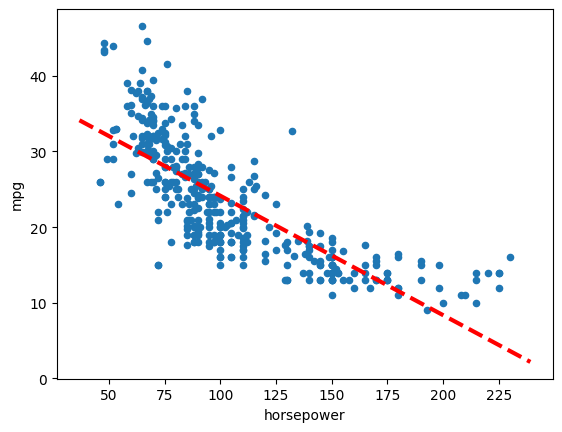

In [17]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,
        results.params[0],
        results.params[1],
       'r--',
       linewidth=3)

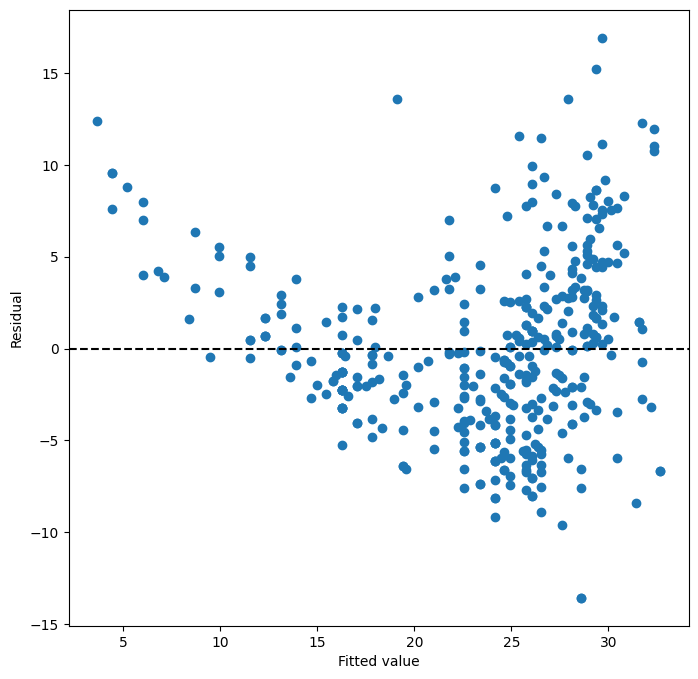

In [18]:
#8c
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

115

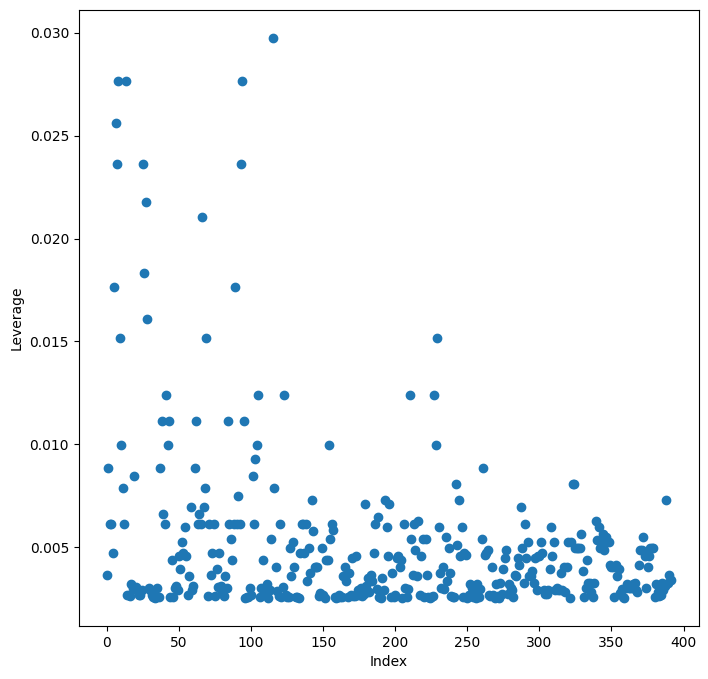

In [19]:
infl=results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

8c) I noticed that the residuals have heteroscedascity, and there are lots of leverage values higher than (p+1)/n=2/392=0.005.

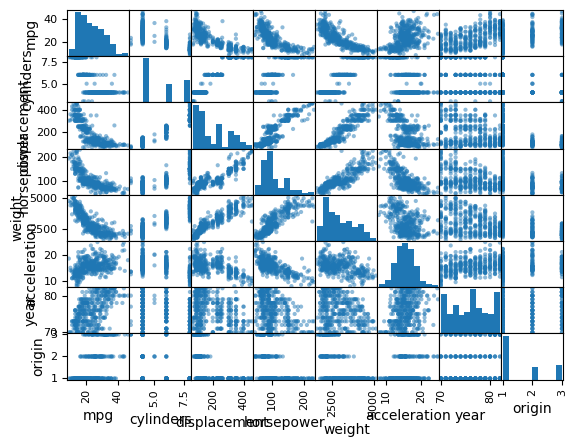

In [20]:
#9a
pd.plotting.scatter_matrix(Auto);

In [21]:
#9b
print(Auto.corr())

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

In [22]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [23]:
#9c
allvars = list(Auto.columns.drop('mpg'))
y = Auto['mpg']
final = allvars
X = MS(final).fit_transform(Auto)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [24]:
anova_lm(results,model.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


In [25]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          2.04e-139
Time:                        00:57:13   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

9c) Some of these predictors have a t-value greater than 0.025, showing insignificance.\
i)Since the p-value in anova_lm is near 0, we can conclude the bigger model is superior and that there seems to be a relationship between the response and the predictors.\
ii)Only displacement, weight,year, and origin are statistically significant.\
iii)The coefficient for "year" suggests that each increase in (single) car model year, holding all other predictors constant, the mpg for a car increases by 0.7508.\

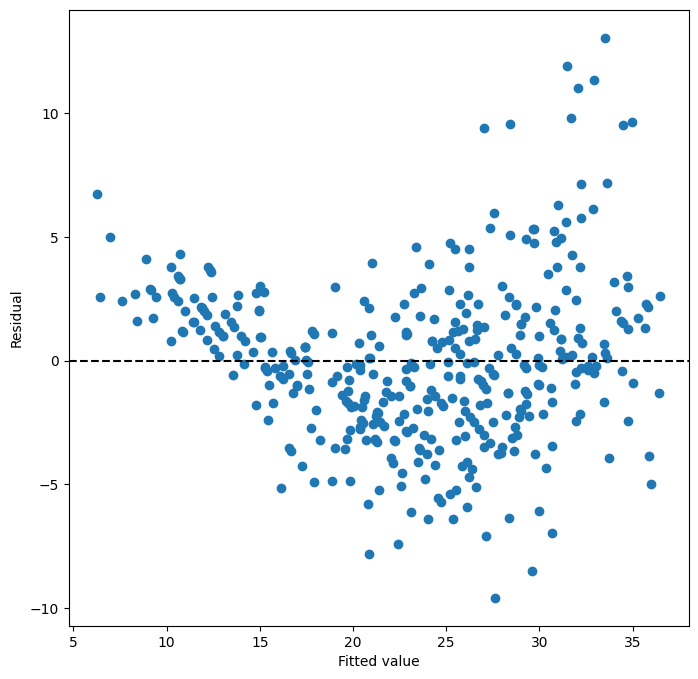

In [26]:
#9d
ax = subplots(figsize=(8,8))[1]
ax.scatter(model.fit().fittedvalues , model.fit().resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

13

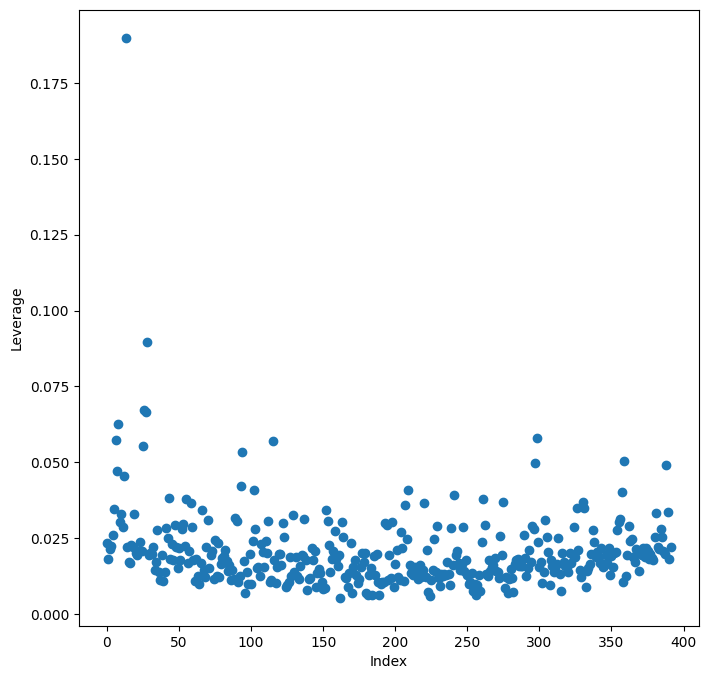

In [27]:
infl=model.fit().get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

9d)I notice that there are some residuals of -10 or 10 (showing high outliers), and that there is one extremely high leverage point.

In [28]:
#9e
#After some changing of predictors (based on collinearity), I found this model where most predictors appear to be statistically significant.
final = allvars + [('horsepower','acceleration'),('displacement','weight','cylinders')]
X = MS(final).fit_transform(Auto)
model = sm.OLS(y, X)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     268.7
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          3.05e-159
Time:                        00:57:14   Log-Likelihood:                -970.78
No. Observations:                 392   AIC:                             1962.
Df Residuals:                     382   BIC:                             2001.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                       -16.5892      4.985     -3.328      0.001     -26.391      -6.788
cylinders                        -0.5427      0.304     -1.783      0.075      -1.141       0.056
displacement                     -0.0385      0.009     -4.527      0.000      -0.055      -0.022
horsepower                        0.0470      0.025      1.875      0.062      -0.002       0.096
weight                           -0.0064      0.001     -8.748      0.000      -0.008      -0.005
acceleration                      0.6089      0.157      3.878      0.000       0.300       0.918
year                              0.7750      0.045     17.320      0.000       0.687       0.863
origin                            0.4834      0.259      1.867      0.063      -0.026       0.992
horsepower:acceleration          -0.0071      0.002     -4.052      0.000      -0.011      -0.004
displacement:weight:cylinders  1.469e-06   1.85e-07      7.954      0.000    1.11e-06    1.83e-06
==============================================================================
Omnibus:                       32.799   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.805
Skew:                           0.437   Prob(JB):                     9.41e-17
Kurtosis:                       4.938   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

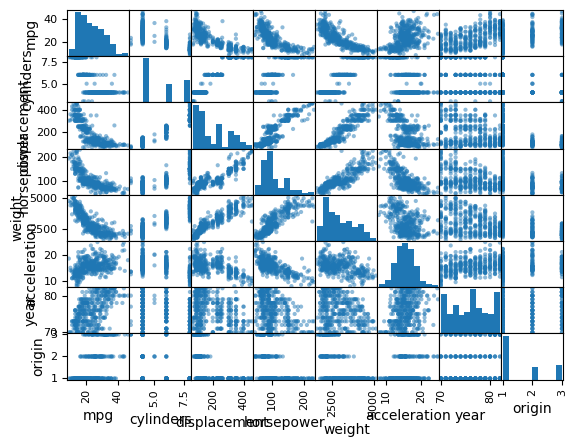

In [29]:
pd.plotting.scatter_matrix(Auto);

In [30]:
print(Auto.corr())

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

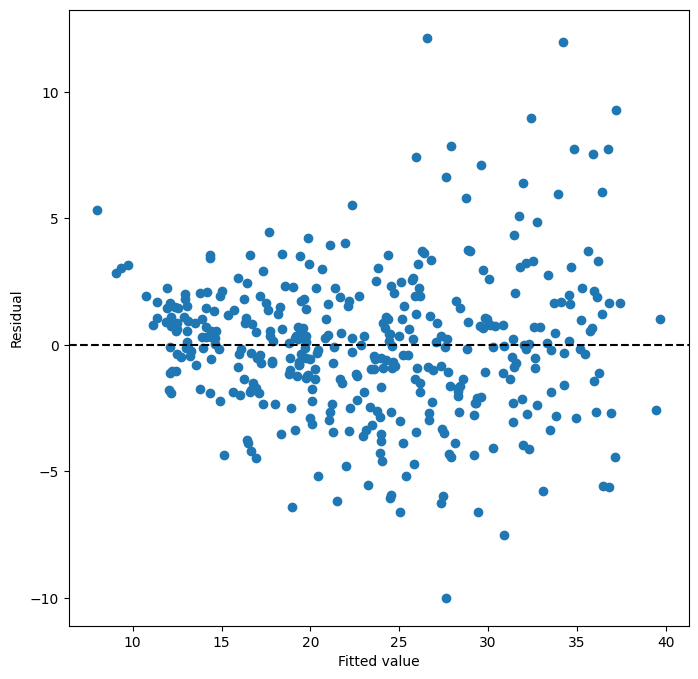

In [31]:
#9f
Autonew=Auto
Autonew['transdisplacement']=1/(Auto['displacement'])
Autonew['transcylinders']=(Auto['cylinders'])**0.5
Autonew['transweight']=-1/(Auto['weight'])
Autonew['transacceleration']=1/(Auto['acceleration'])
Autonew['transhorsepower']=-1/(Auto['horsepower'])
Autonew['transorigin']=(Auto['origin'])**2
Autonew['transyear']=(Auto['year'])**2
Autonew=Autonew.drop(['displacement','cylinders','weight','acceleration','horsepower','origin','year'],axis=1)
y1 = Autonew['mpg']
allvars1 = list(Autonew.columns.drop(['mpg']))
final1 = allvars1
X1 = MS(final1).fit_transform(Autonew)
modelnew = sm.OLS(y1, X1)
ax = subplots(figsize=(8,8))[1]
ax.scatter(modelnew.fit().fittedvalues , model.fit().resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');
#This was the best I could do, but I was able to clump the data together.

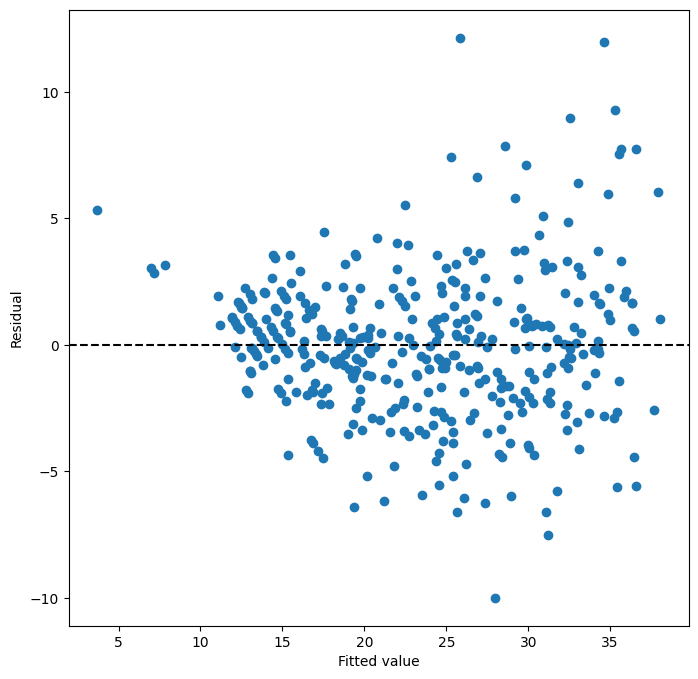

In [32]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(model.fit().fittedvalues , model.fit().resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');